<a href="https://colab.research.google.com/github/zahwawrr/Predicting-Rainfall-in-Australia-using-Random-Forest/blob/main/Tugas_Akhir_Daming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#membaca data
import pandas as pd
from math import sqrt
import numpy as np
import datetime as dt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tugas Akhir Daming/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##Praproses



In [3]:
#melihat ukuran data
df.shape

(145460, 23)

In [4]:
#melihat banyaknya missing data pada setiap kolom dalam persen
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

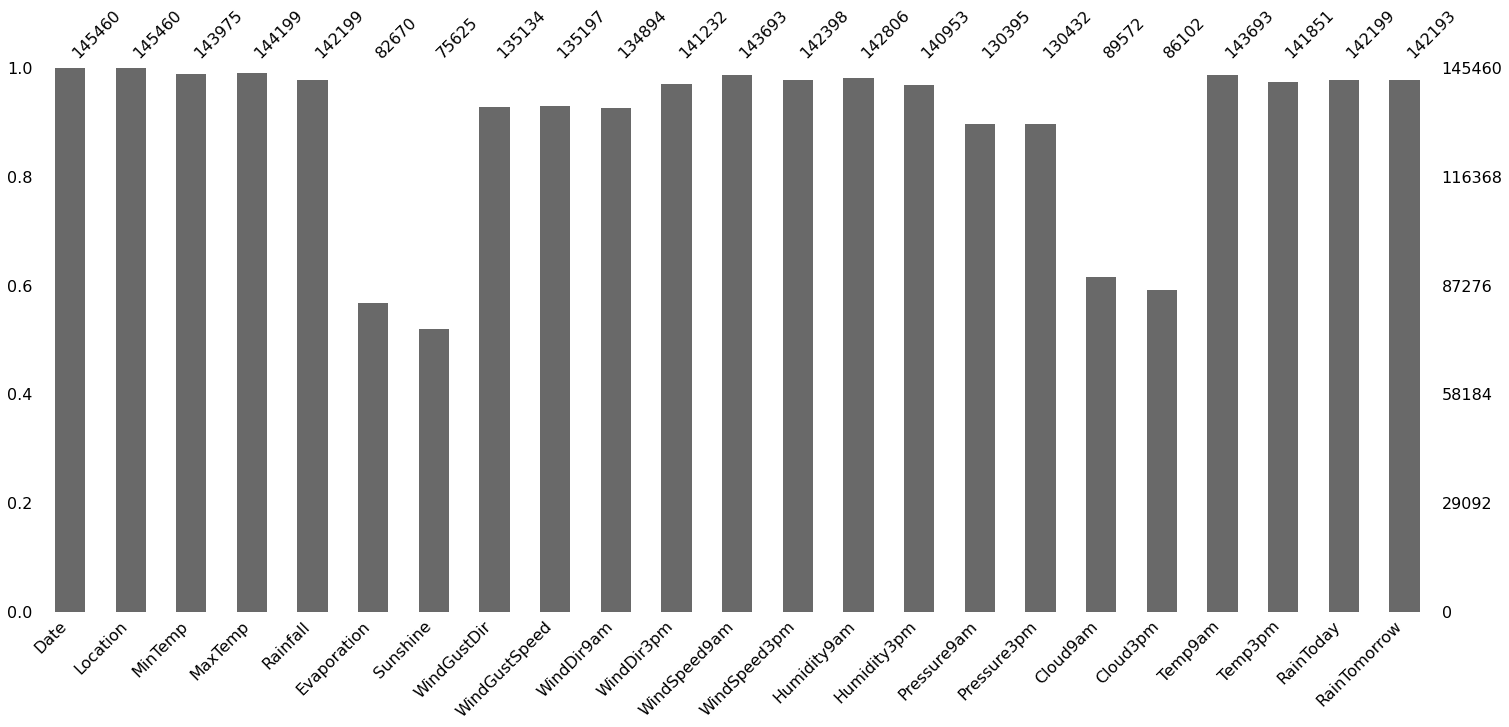

In [5]:
# visualisasi missing value

import missingno as msno

msno.bar(df)

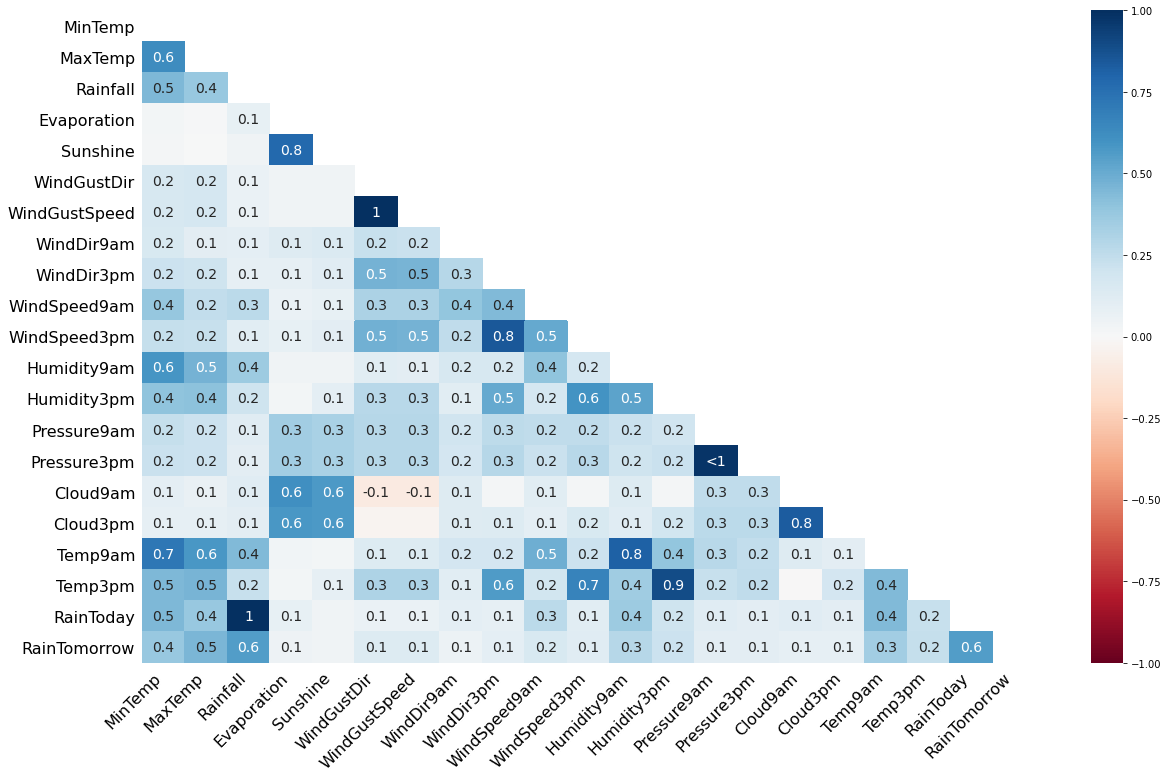

In [6]:
msno.heatmap(df)

In [7]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [8]:
# drop baris yg raintomorrow nya kosong
df= df.dropna(axis=0, how='any', subset=['RainTomorrow', 'Rainfall', 'RainToday'])

In [9]:
# filling the missing values for continuous variables with mean
df["MinTemp"]= df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]= df["MaxTemp"].fillna(df["MaxTemp"].mean())
# df["Evaporation"]= df["Evaporation"].fillna(df["Evaporation"].mean())
# df["Sunshine"]= df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustSpeed"]= df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["Rainfall"]= df["Rainfall"].fillna(df["Rainfall"].median())
df["WindSpeed9am"]= df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]= df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]= df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]= df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]= df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]= df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
# df["Cloud9am"]= df["Cloud9am"].fillna(df["Cloud9am"].mean())
# df["Cloud3pm"]= df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]= df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]= df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [10]:
#Filling the missing values for continuous variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [11]:
#cek skewness dan kurtosis kolom numerik

print('MinTemp:\n',df["MinTemp"].agg(['skew', 'kurtosis']).transpose())
print('MaxTemp:\n',df["MaxTemp"].agg(['skew', 'kurtosis']).transpose())
# print('Evaporation:\n',df["Evaporation"].agg(['skew', 'kurtosis']).transpose())
# print('Sunshine:\n',df["Sunshine"].agg(['skew', 'kurtosis']).transpose())
print('WindGustSpeed:\n',df["WindGustSpeed"].agg(['skew', 'kurtosis']).transpose())
print('Rainfall:\n',df["Rainfall"].agg(['skew', 'kurtosis']).transpose())
print('WindSpeed9am:\n',df["WindSpeed9am"].agg(['skew', 'kurtosis']).transpose())
print('WindSpeed3pm:\n',df["WindSpeed3pm"].agg(['skew', 'kurtosis']).transpose())
print('Humidity9am:\n',df["Humidity9am"].agg(['skew', 'kurtosis']).transpose())
print('Humidity3pm:\n',df["Humidity3pm"].agg(['skew', 'kurtosis']).transpose())
print('Pressure9am:\n',df["Pressure9am"].agg(['skew', 'kurtosis']).transpose())
print('Pressure3pm:\n',df["Pressure3pm"].agg(['skew', 'kurtosis']).transpose())
# print('Cloud9am:\n',df["Cloud9am"].agg(['skew', 'kurtosis']).transpose())
# print('Cloud3pm:\n',df["Cloud3pm"].agg(['skew', 'kurtosis']).transpose())
print('Temp9am:\n',df["Temp9am"].agg(['skew', 'kurtosis']).transpose())
print('Temp3pm:\n',df["Temp3pm"].agg(['skew', 'kurtosis']).transpose())

#yg highly skewed: Rainfall

MinTemp:
 skew        0.026224
kurtosis   -0.482111
Name: MinTemp, dtype: float64
MaxTemp:
 skew        0.230425
kurtosis   -0.246781
Name: MaxTemp, dtype: float64
WindGustSpeed:
 skew        0.901081
kurtosis    1.709867
Name: WindGustSpeed, dtype: float64
Rainfall:
 skew          9.888061
kurtosis    180.002097
Name: Rainfall, dtype: float64
WindSpeed9am:
 skew        0.777435
kurtosis    1.258464
Name: WindSpeed9am, dtype: float64
WindSpeed3pm:
 skew        0.637160
kurtosis    0.849718
Name: WindSpeed3pm, dtype: float64
Humidity9am:
 skew       -0.484832
kurtosis   -0.008409
Name: Humidity9am, dtype: float64
Humidity3pm:
 skew        0.034842
kurtosis   -0.449907
Name: Humidity3pm, dtype: float64
Pressure9am:
 skew       -0.101868
kurtosis    0.587447
Name: Pressure9am, dtype: float64
Pressure3pm:
 skew       -0.049245
kurtosis    0.473532
Name: Pressure3pm, dtype: float64
Temp9am:
 skew        0.091783
kurtosis   -0.339350
Name: Temp9am, dtype: float64
Temp3pm:
 skew        0.2455

In [12]:
df['Rainfall'] = np.log1p(df['Rainfall'])

In [13]:
print('Rainfall:\n',df["Rainfall"].agg(['skew', 'kurtosis']).transpose())

Rainfall:
 skew        2.047394
kurtosis    3.550738
Name: Rainfall, dtype: float64


In [14]:
def season_feature(df):
  month = []
  
  for num in df['Date']:
    date_obj = dt.datetime.strptime(num, '%Y-%m-%d')
    month.append(date_obj.month)

  season_per_month = ['Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring','Summer']

  season = [season_per_month[i-1] for i in month]

  n = df.columns[0]

  df.drop(n, axis=1, inplace=True)

  df['Seasons'] = season

  df = df[['Seasons'] + [col for col in df.columns if col != 'Seasons']]

  return df

In [15]:
df = season_feature(df)

In [16]:
categorical = df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Seasons']]
numerical = df.drop(categorical.columns, axis=1)

In [17]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X_num = scaler.fit_transform(numerical)
# X_num_df = pd.DataFrame(X_num, columns=numerical.columns)
# X_num_df

In [18]:
# df= pd.concat([X_num_df, pd.DataFrame(categorical)], axis=1)

In [19]:
df.head()

,Seasons,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Summer,Albury,13.4,22.9,0.470004,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Summer,Albury,7.4,25.1,0.000000,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Summer,Albury,12.9,25.7,0.000000,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Summer,Albury,9.2,28.0,0.000000,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Summer,Albury,17.5,32.3,0.693147,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [20]:
#Last check null values
(df.isnull().sum()/len(df))*100

Seasons          0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

##Label Encoding

In [21]:
#Mapping yes = 1, no = 0
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#label encoding kolom kategorikal lainnya
df["Location"] = le.fit_transform(df["Location"])
df["WindDir9am"]= le.fit_transform(df["WindDir9am"])
df["WindDir3pm"]= le.fit_transform(df["WindDir3pm"])
df["WindGustDir"] = le.fit_transform(df["WindGustDir"])
df["Seasons"] = le.fit_transform(df["Seasons"])

##Plotting

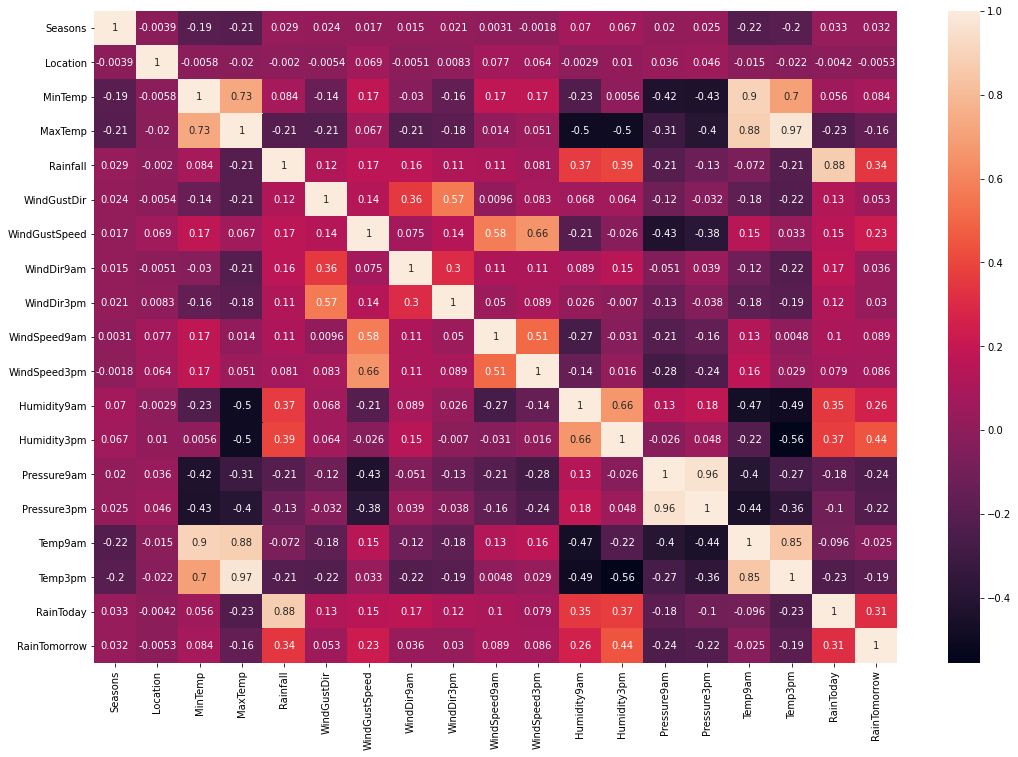

In [23]:
#Heatmap untuk mencari korelasi antar variabel
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

# korelasi tinggi:
# MinTemp & Temp9am
# MinTemp & Temp3pm
# MaxTemp & Temp9am
# MaxTemp & Temp3pm
# Temp3pm & Temp9am
# Humidity9am & Humidity3pm

In [24]:
#Dropping highly correlated columns
#Kolom yg berkorelasi akan mempengaruhi akurasi model krn mempengaruhi model scr simultan

df=df.drop(['Temp3pm','Temp9am',"Pressure9am"],axis=1)
df.columns

Index(['Seasons', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

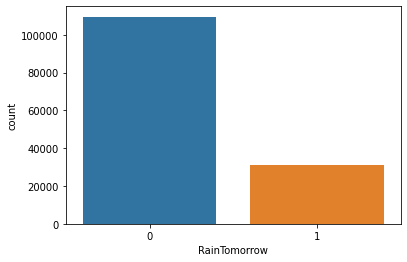

In [25]:
#plotting kolom raintoday dan raintomorrow
#terlihat imbalance karena 0 (tidak hujan) lebih banyak daripada 1 (hujan)
#treated with oversampling

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='RainTomorrow', data=df)
plt.show()

In [26]:
df['RainTomorrow'].value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

##Oversampling for Imbalanced Data Using SMOTE

In [27]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [28]:
print(y_test.count())

28158


In [29]:
print(y_train.count())

112629


In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

os = SMOTE(random_state=101)
x_res, y_res = os.fit_resample(X_train, y_train)
count = Counter(y_res)
print(count)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 87689, 1: 87689})


In [35]:
# #sebaran data setelah oversampling

# from numpy import where

# # scatter plot of examples by class label
# for label, _ in count.items():
# 	row_ix = where(y_res == label)[0]
# 	plt.scatter(x_res[row_ix, 0], x_res[row_ix, 1], label=str(label))
# plt.legend()
# plt.show()

##Modelling

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score

classifier = RandomForestClassifier(n_estimators=175, random_state=42) # increasing number of trees for better accuracy
classifier.fit(x_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##Evaluating Model

In [37]:
#Accuracy of Random Forest Classifier Model
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21897
           1       0.70      0.58      0.63      6261

    accuracy                           0.85     28158
   macro avg       0.79      0.75      0.77     28158
weighted avg       0.84      0.85      0.85     28158

Accuracy of the Random Forest Model is: 85.10192485261737 %


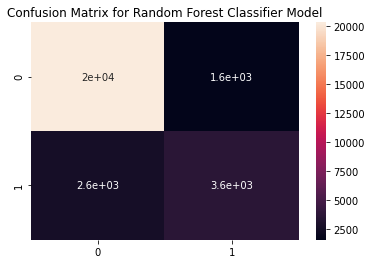

In [38]:
#Evaluating model using confusion matrix

print(report)
print("Accuracy of the Random Forest Model is:",accuracy_score(y_test,y_pred)*100,"%")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.show()

In [39]:
print(accuracy_score(y_test, y_pred))

0.8510192485261737


In [40]:
# #Evaluating model using probability (AUC)
# y_pred_proba = classifier.predict_proba(X_test)
# pos_proba = y_pred_proba[:,1]

In [41]:
# fpr, tpr, thresholds = roc_curve(y_test, pos_proba)
# plt.plot(fpr, tpr, '*-')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.legend(['Random forest', 'Random chance'])
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve for Random Forest Classifier')

In [42]:
# # this score helps in identifying efficiency of classifier
# roc_auc_score(y_test, pos_proba)

In [43]:
from sklearn.metrics import mean_squared_error

y_res_predicted = classifier.predict(x_res)
y_test_predicted = classifier.predict(X_test)
mse_train = mean_squared_error(y_res, y_res_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
print(mse_train)
print(mse_test)

1.7105908380754713e-05
0.14898075147382628


In [44]:
df = pd.DataFrame(df)

In [45]:
x_res = pd.DataFrame(x_res, columns=X.columns)
x_res.head()

,Seasons,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday
0,1.0,31.0,13.5,26.0,0.0,12.0,33.0,1.0,12.0,7.0,17.0,52.0,48.0,1016.2,0.0
1,1.0,20.0,16.0,30.0,0.0,3.0,43.0,3.0,3.0,31.0,11.0,24.0,22.0,1019.8,0.0
2,0.0,47.0,19.0,26.3,0.0,4.0,41.0,6.0,5.0,7.0,15.0,85.0,79.0,1013.2,0.0
3,0.0,39.0,14.7,27.2,0.0,0.0,50.0,11.0,0.0,13.0,22.0,48.0,47.0,1018.7,0.0
4,3.0,34.0,5.7,15.5,0.0,2.0,11.0,3.0,15.0,0.0,6.0,99.0,63.0,1005.3,0.0


In [46]:
importances = classifier.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

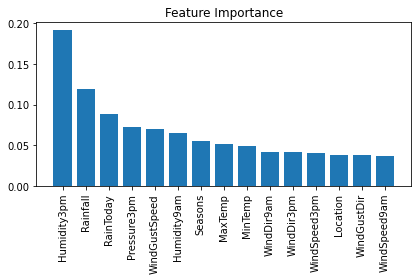

In [47]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_res.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_res.shape[1]), x_res.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()